# Scaler
- Feature scaling을 하는 이유: 서로 다른 변수의 값 범위를 일정한 수준으로 맞추기 위해

<br>

- 표준화 (Standardization)
    - 데이터의 피처 각각이 평균이 0이고 분산이 1인 가우시안 정규분포를 가진 값으로 변환하는 것을 의미
$$x_inew=\frac{x_i-mean(x)}{stdev(x)}$$

<br>

- 정규화 (Normalization)
    - 서로 다른 피처의 크기를 통일하기 위헤 크기를 변환하여 서로 다른 피처의 단위를 통일 시킴
   $$x_inew=\frac{x_i-min(x)}{max(x)-min(x)}$$

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')
plt.style.use(['seaborn-whitegrid'])

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

wine=load_wine()
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)
wine_df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [19]:
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.2)

model=LogisticRegression(max_iter=10)
model.fit(X_train, y_train)

print('학습 데이터 점수: {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test, y_test)))

학습 데이터 점수: 0.704225352112676
평가 데이터 점수: 0.5


In [20]:
pd.Series(wine.target).value_counts()

1    71
0    59
2    48
dtype: int64

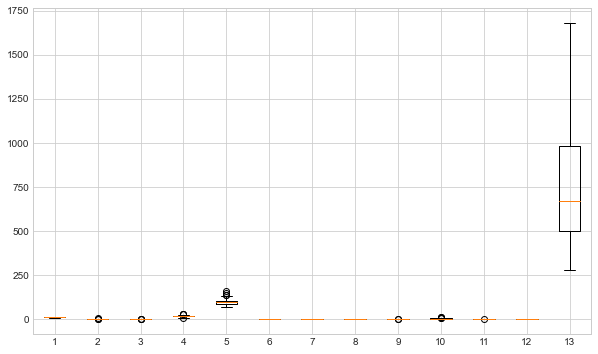

In [26]:
plt.figure(figsize=(10, 6))
plt.boxplot(wine_df);

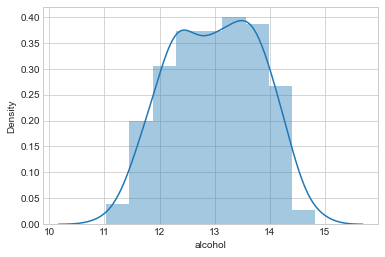

In [17]:
sns.distplot(wine_df.alcohol);

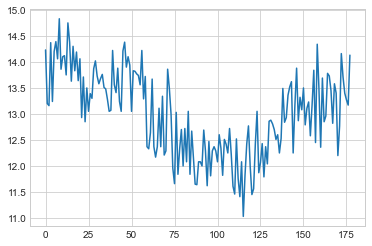

In [5]:
plt.plot(wine_df.alcohol);

## StandardScaler: 표준화
- 로지스틱 회귀, 선형회귀, 서포트 벡터 머신에 표준화를 적용하는 것이 유리
- 데이터가 가우시안 분포를 가정하고 구현된 모델이기 때문

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
wine_scaled = scaler.fit_transform(wine_df)
wine_df_scaled = pd.DataFrame(wine_scaled, columns=wine.feature_names)
wine_df_scaled.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,7.841418e-15,2.444986e-16,-4.059175e-15,-7.110417e-17,-2.494883e-17,-1.955365e-16,9.443133e-16,-4.178929e-16,-1.540590e-15,-4.129032e-16,1.398382e-15,2.126888e-15,-6.985673e-17
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246e+00,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-8.854682e-01,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,9.595986e-02,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,8.089974e-01,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515e+00,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


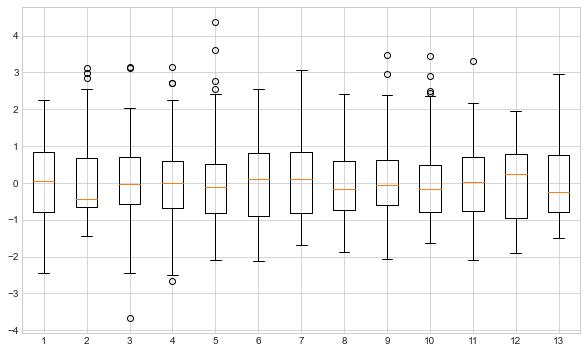

In [28]:
plt.figure(figsize=(10, 6))
plt.boxplot(wine_df_scaled);

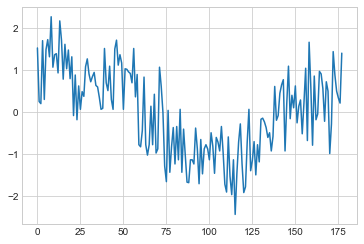

In [7]:
plt.plot(wine_df_scaled.alcohol);

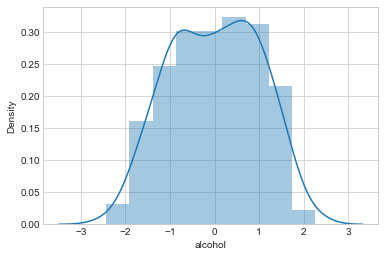

In [8]:
sns.distplot(wine_df_scaled.alcohol);

In [9]:
wine_stand_scaled = scaler.fit_transform(wine.data)

X_train, X_test, y_train, y_test = train_test_split(wine_stand_scaled, wine.target, test_size=0.2)

model=LogisticRegression(max_iter=10)
model.fit(X_train, y_train)

print('학습 데이터 점수: {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test, y_test)))

학습 데이터 점수: 1.0
평가 데이터 점수: 0.9722222222222222


## MinMaxScaler

In [29]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
wine_scaled = scaler.fit_transform(wine_df)
wine_df_scaled = pd.DataFrame(wine_scaled, columns=wine.feature_names)
wine_df_scaled.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.518584,0.315484,0.538244,0.458502,0.323278,0.453487,0.356386,0.437460,0.372523,0.322363,0.388170,0.491460,0.334446
std,0.213639,0.220780,0.146708,0.172142,0.155244,0.215811,0.210730,0.234818,0.180555,0.197806,0.185831,0.260070,0.224613
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.350658,0.170455,0.454545,0.340206,0.195652,0.262931,0.182489,0.264151,0.264984,0.165529,0.245935,0.244505,0.158702
50%,0.531579,0.222332,0.534759,0.458763,0.304348,0.474138,0.378692,0.396226,0.361199,0.290956,0.394309,0.553114,0.282097
75%,0.696711,0.462945,0.640374,0.561856,0.402174,0.627586,0.534810,0.580189,0.485804,0.419795,0.520325,0.695971,0.504280
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


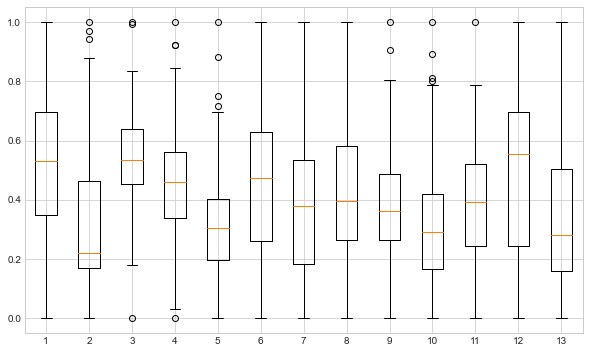

In [30]:
plt.figure(figsize=(10, 6))
plt.boxplot(wine_df_scaled);

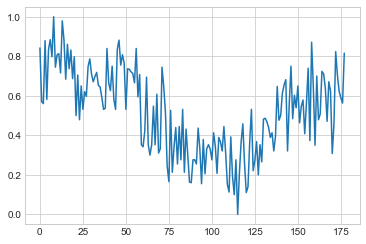

In [11]:
plt.plot(wine_df_scaled.alcohol);

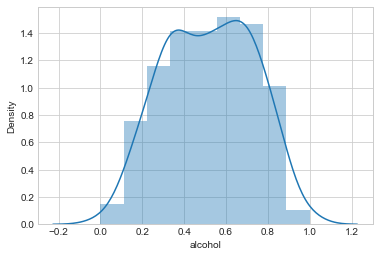

In [12]:
sns.distplot(wine_df_scaled.alcohol);

In [13]:
wine_MinMax_scaled = scaler.fit_transform(wine.data)

X_train, X_test, y_train, y_test = train_test_split(wine_MinMax_scaled, wine.target, test_size=0.2)

model=LogisticRegression(max_iter=10)
model.fit(X_train, y_train)

print('학습 데이터 점수: {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test, y_test)))

학습 데이터 점수: 0.9929577464788732
평가 데이터 점수: 0.9722222222222222


## 학습데이터와 테스트 데이터의 스케일링 변환 시 유의점
1. 가능하다면 전체 데이터 스케일링 변환을 적용한 뒤 학습과 테스트 데이터로 분리
2. 1이 여의치 않다면 테스트 데이터 변환 시엔 fit( )이나 fit_transform( )을 적용하지 않고 학습 데이터로 이미 fit( )된 Scaler 객체를 이용해 transform( )으로 변환
->테스트 데이터는 학습 데이터의 스케일링 기준에 따라야 하므로 fit을 두번해서는 안된다.